<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [115]:
!pip install wget
import wget

wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite')

100% [....................................................] 36679680 / 36679680

'm4_survey_data (4).sqlite'

Connect to the database.


In [346]:
import sqlite3
conn = sqlite3.connect("m4_survey_data (1).sqlite") # open a database connection

Import pandas module.


In [117]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


## Demo: How to run an sql query


In [118]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [353]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [120]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [121]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


In [363]:
QUERY = """
SELECT * FROM master
"""

df = pd.read_sql_query(QUERY,conn)
df.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


### Histograms


Plot a histogram of `ConvertedComp.`


In [45]:
# your code goes here
QUERY = """
SELECT ConvertedComp FROM master
"""

hist_data = pd.read_sql_query(QUERY,conn)
hist_data

fig1 = px.histogram(hist_data, x="ConvertedComp",title="ConvertedComp")
fig1.show()

### Box Plots


Plot a box plot of `Age.`


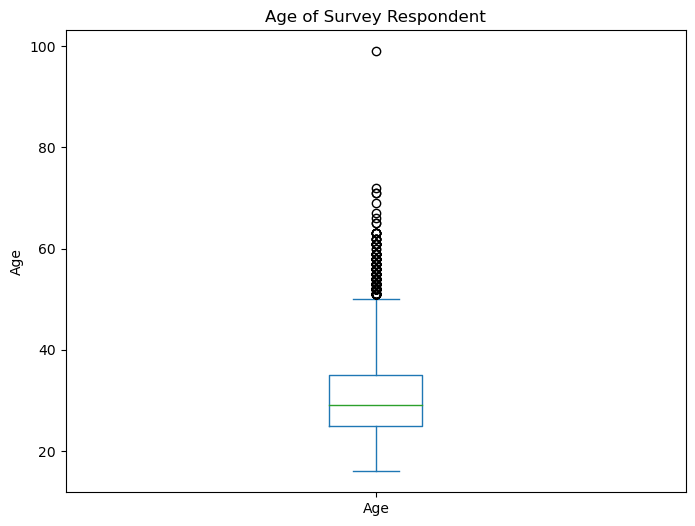

In [50]:
# your code goes here
QUERY = """
SELECT Age FROM master
"""

bar_data = pd.read_sql_query(QUERY,conn)



bar_data.plot(kind='box', figsize=(8, 6))

plt.title('Age of Survey Respondent')
plt.ylabel('Age')

plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [56]:
# your code goes here

QUERY = """
SELECT Age, WorkWeekHrs FROM master
"""

scatter_data = pd.read_sql_query(QUERY,conn)

scatter_data



scatter_data['WorkWeekHrs'].max()


1012.0

In [57]:
##First we will create an empty figure ising go.Figure()
fig3=go.Figure()
#Next we will create a scatter plot by using the add_trace function and use the go.scatter() function within it
# In go.Scatter we define the x-axis data,y-axis data and define the mode as markers with color of the marker as red
fig3.add_trace(go.Scatter(x=scatter_data['Age'], y=scatter_data['WorkWeekHrs'], mode='markers', marker=dict(color='green')))
fig3.update_layout(title='Age vs Hours Completed in Work Week', xaxis_title='Age', yaxis_title='Weekly Work Hours')
# Display the figure
fig3.show()



### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [137]:
# your code goes here

QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs FROM master
"""

bubble_data = pd.read_sql_query(QUERY,conn)

bubble_data.head()
    


,Age,WorkWeekHrs,CodeRevHrs
0,22.0,80.0,NaN
1,23.0,32.0,12.0
2,28.0,40.0,5.0
3,26.0,40.0,NaN
4,29.0,45.0,5.0


In [138]:
code_mean = bubble_data[['CodeRevHrs']].mean()

age_mean = bubble_data[['Age']].mean()

work_mean = bubble_data[['WorkWeekHrs']].mean()

code_mean, age_mean, work_mean

(CodeRevHrs    4.781071
 dtype: float64,
 Age    30.779318
 dtype: float64,
 WorkWeekHrs    42.064606
 dtype: float64)

In [139]:
#clean data
bubble_data[['CodeRevHrs']] = bubble_data[['CodeRevHrs']].fillna(code_mean)

bubble_data[['Age']] = bubble_data[['Age']].fillna(age_mean)

bubble_data[['WorkWeekHrs']] = bubble_data[['WorkWeekHrs']].fillna(work_mean)




bubble_data.head()

,Age,WorkWeekHrs,CodeRevHrs
0,22.0,80.0,4.781071
1,23.0,32.0,12.000000
2,28.0,40.0,5.000000
3,26.0,40.0,4.781071
4,29.0,45.0,5.000000


In [140]:
bubble_data.dtypes

Age            float64
WorkWeekHrs    float64
CodeRevHrs     float64
dtype: object

In [141]:
fig4 = px.scatter(bubble_data, x="WorkWeekHrs", y="CodeRevHrs", size="Age",
                 hover_name="WorkWeekHrs", title='Reporting Work Week Hours vs Code Rev Hrs', size_max=60)
fig4.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [200]:
# your code goes here

QUERY = """
SELECT * FROM DatabaseDesireNextYear
"""

pie_data = pd.read_sql_query(QUERY,conn)

pie_data.head()


,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite


In [337]:
top_5 = pie_data.groupby(['DatabaseDesireNextYear']).size().to_frame().sort_values([0], ascending = False).head()

top_5.rename(columns = {0: 'Count'}, inplace = True)

top_5.reset_index(inplace = True)

top_5.head()

,DatabaseDesireNextYear,Count
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


5

In [226]:
fig5 = px.pie(top_5, values='Count', names='DatabaseDesireNextYear', title='Databases People Most Want to Learn')
fig5.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


/var/folders/3s/wzmhlghj2bnbnn9ddcdf9kcr0000gn/T/ipykernel_75165/347642427.py:15: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



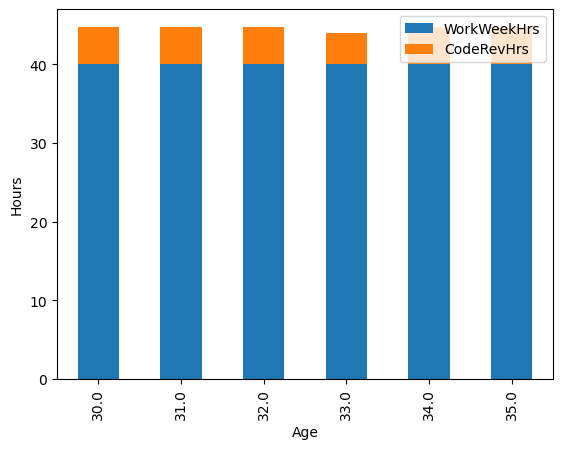

In [320]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs FROM master

WHERE Age BETWEEN 30 AND 35
"""
stacked_data = pd.read_sql_query(QUERY,conn)

stacked_data['CodeRevHrs'].fillna(stacked_data['CodeRevHrs'].mean(), inplace = True)
stacked_data['Age'].fillna(stacked_data['Age'].mean(), inplace = True)
stacked_data['WorkWeekHrs'].fillna(stacked_data['WorkWeekHrs'].mean(), inplace = True)



stacked_data = stacked_data.groupby(['Age'])['WorkWeekHrs', 'CodeRevHrs'].median().plot.bar(stacked = True, ylabel = 'Hours')



## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<Axes: title={'center': 'Compensation by Age'}, xlabel='Age', ylabel='Converted Compensation'>

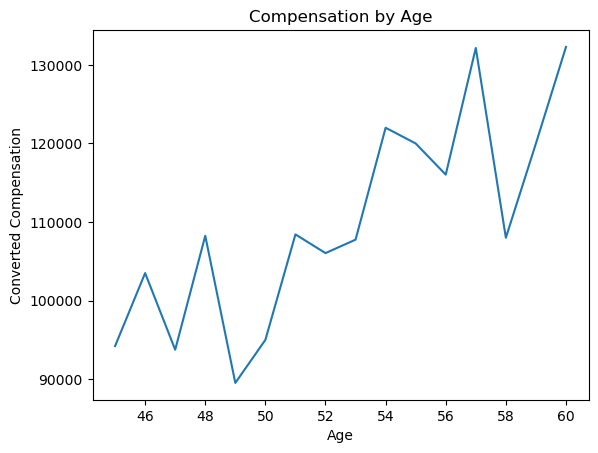

In [300]:
# your code goes here

QUERY = """
SELECT Age, ConvertedComp FROM master

WHERE Age BETWEEN 45 AND 60
"""
line_data = pd.read_sql_query(QUERY,conn)

line_data['ConvertedComp'].fillna(line_data['ConvertedComp'].mean(), inplace = True)

line_data.groupby(['Age'])['ConvertedComp'].median().plot.line(title = 'Compensation by Age', ylabel = 'Converted Compensation')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<Axes: title={'center': 'Developer or Nah?'}, ylabel='MainBranch'>

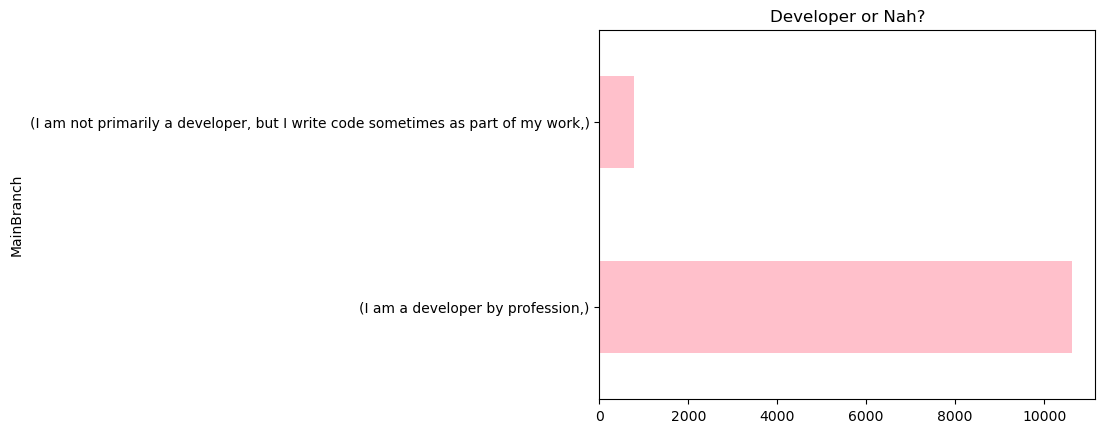

In [334]:
# your code goes here
QUERY = """
SELECT MainBranch FROM master

"""
hor_bar_data = pd.read_sql_query(QUERY,conn)

hor_bar_data['MainBranch'].fillna(hor_bar_data['MainBranch'].mode(), inplace = True)


hor_bar_data.value_counts().plot(kind = 'barh', title = 'Developer or Nah?', color = 'pink')




In [350]:
QUERY = """
SELECT LanguageDesireNextYear FROM LanguageDesireNextYear

"""
language_data = pd.read_sql_query(QUERY,conn)

language_data.value_counts()

LanguageDesireNextYear
JavaScript                6630
HTML/CSS                  5328
Python                    5239
SQL                       5012
TypeScript                4088
C#                        3591
Bash/Shell/PowerShell     3097
Java                      2953
Go                        2759
Kotlin                    1890
C++                       1633
Rust                      1520
PHP                       1457
WebAssembly               1397
Swift                     1179
Ruby                      1029
C                         1028
Scala                      879
R                          850
Other(s):                  836
F#                         621
Elixir                     620
Dart                       610
Clojure                    413
Assembly                   336
Objective-C                310
Erlang                     310
VBA                        149
dtype: int64

In [357]:


QUERY = """
SELECT LanguageWorkedWith FROM LanguageWorkedWith

"""
language2_data = pd.read_sql_query(QUERY,conn)

language2_data.value_counts()

LanguageWorkedWith   
JavaScript               8687
HTML/CSS                 7830
SQL                      7106
Bash/Shell/PowerShell    4642
Python                   4542
Java                     4506
C#                       4288
TypeScript               3232
PHP                      2913
C++                      1946
C                        1578
Ruby                     1149
Go                       1114
Other(s):                 840
Kotlin                    751
Swift                     707
VBA                       628
R                         585
Objective-C               518
Scala                     492
Assembly                  437
Rust                      324
Dart                      237
Elixir                    187
Clojure                   164
F#                        158
WebAssembly               133
Erlang                     98
dtype: int64

In [362]:


QUERY = """
SELECT DatabaseWorkedWith FROM DatabaseWorkedWith


"""
database_data = pd.read_sql_query(QUERY,conn)

database_data.value_counts()

DatabaseWorkedWith  
MySQL                   5469
Microsoft SQL Server    4110
PostgreSQL              4097
SQLite                  3248
MongoDB                 3016
Redis                   2508
Elasticsearch           1954
Oracle                  1744
MariaDB                 1709
Firebase                1314
DynamoDB                 831
Other(s):                728
Cassandra                397
Couchbase                250
dtype: int64

In [367]:


QUERY = """
SELECT DevType FROM DevType


"""

type_data = pd.read_sql_query(QUERY,conn)

type_data.value_counts()

DevType                                      
Developer, full-stack                            6928
Developer, back-end                              6290
Developer, front-end                             3920
Developer, desktop or enterprise applications    2575
Developer, mobile                                1959
DevOps specialist                                1639
Database administrator                           1413
System administrator                             1202
Designer                                          988
Developer, QA or test                             911
Developer, embedded applications or devices       854
Engineer, data                                    832
Data scientist or machine learning specialist     803
Data or business analyst                          802
Student                                           766
Academic researcher                               556
Educator                                          514
Product manager                     

Close the database connection.


In [368]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
